In [1]:
import numpy as np
import os
import math

from PIL import Image

# Clustering
from sklearn.cluster import AgglomerativeClustering # 1) Agglomerative-Hierarchical
from sklearn.cluster import KMeans                  # 2) K-Means
from sklearn.mixture import GaussianMixture         # 3) Gaussian Mixture Models

from sklearn.preprocessing import StandardScaler
# Evaluation
from sklearn import metrics
from skimage.external import tifffile
from skimage.measure import compare_mse
from skimage.metrics import structural_similarity as ssim

from sklearn.decomposition import PCA, KernelPCA               # 2) PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt 
%matplotlib inline
import newscripts as myutils

Using TensorFlow backend.


In [2]:
# Data loading

# directory = "../../Data/train"
directory = "../../Data/Kather_all"
namesandvalues = myutils.loadData(directory)
meanMatrix = np.asarray(namesandvalues[0])
image_names = namesandvalues[1]

labels_true = myutils.loadLabelsFromsubdirectoryindex(image_names, "../../Data/Kather_5000")

In [3]:
# Data preprocessing

# Reshape for scaling and clustering (1 feature dimension)
meanMatrix = meanMatrix.reshape(meanMatrix.shape[0], -1) 
print(meanMatrix.shape)

# Scale
scaledMatrix = StandardScaler().fit_transform(meanMatrix)

(5000, 67500)


In [4]:
# PCA 
pca = PCA(n_components=0.80)
transformedData = pca.fit_transform(scaledMatrix)
pca.n_components_

36

(5000, 36)
HC Silhouette Score  0.1443099312168683 
kmeans Silhouette Score  0.2562770168203331 
gmm Silhouette Score  -0.01355043005296319 


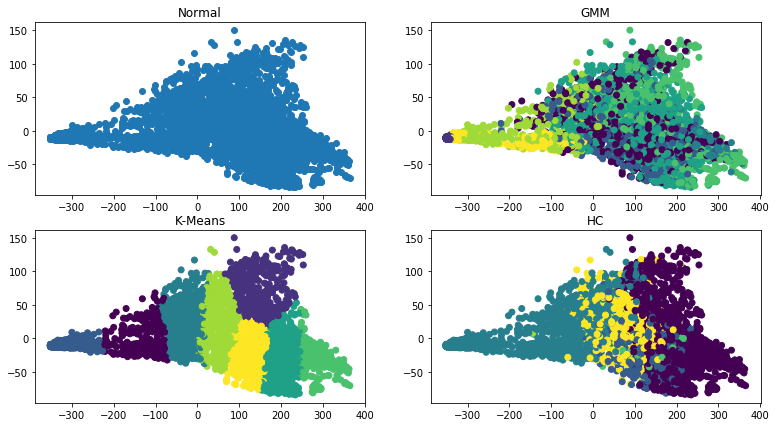

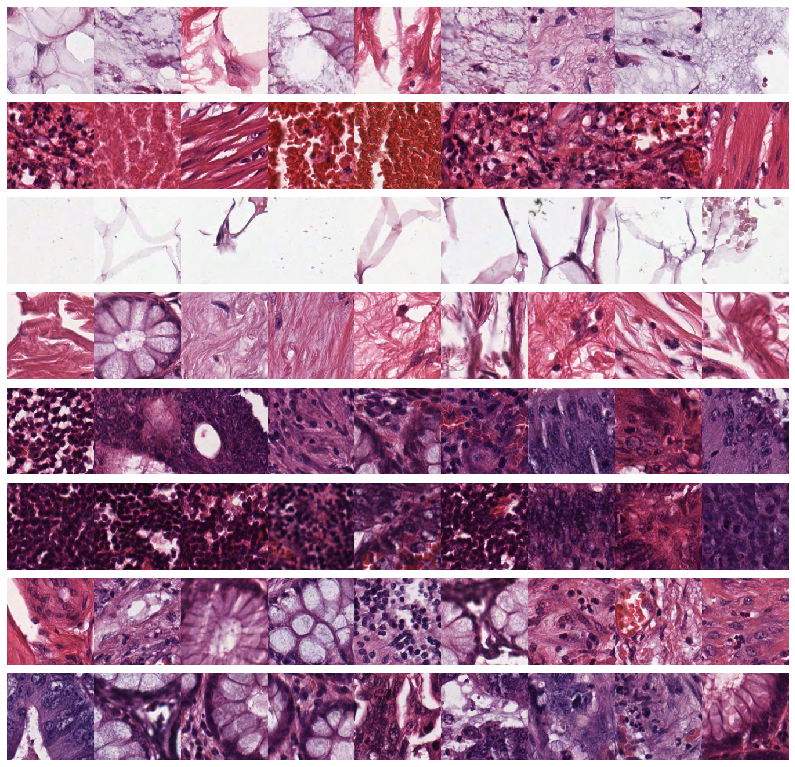

In [6]:
Labels = myutils.ClusterAndPlot(8, transformedData)
myutils.clusterintoDirectories(Labels[1], directory, image_names)
myutils.pltPathologyClusters(Labels[1], directory)

In [8]:
myutils.evaluateAll3withLabels(Labels, labels_true)

KMeans Adjusted Rand index 0.4756022777017273
KMeans homogeneity_score 0.46623574786723804
KMeans adjusted_rand_score 0.33757599336578537
KMeans completeness_score 0.48800138828197126
KMeans v_measure_score 0.4741664656655536


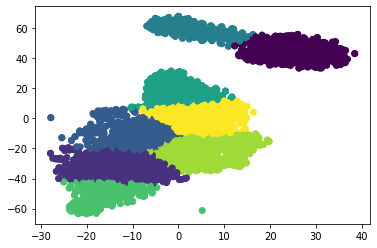

In [5]:
tsne1 = TSNE(n_components=2, perplexity = 50).fit_transform(transformedData)
kmeans1 = KMeans(n_clusters=8).fit(tsne1)

plt.scatter(tsne1[:, 0], tsne1[:, 1], c=kmeans1.labels_, cmap='viridis')